In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
tictactoe = pd.read_csv("tic-tac-toe.csv")

In [3]:
tictactoe.head()

,a11,a12,a13,a21,a22,a23,a31,a32,a33,S
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0AA6317C0>]],
      dtype=object)

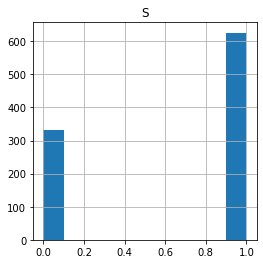

In [4]:
tictactoe.hist(column=['S'],layout=(1,1),figsize=(4,4))

In [11]:
X=tictactoe.drop(['S'],axis=1)
Y=tictactoe['S']
n=len(X)

In [200]:
from sklearn.neural_network import MLPClassifier
algo = MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(4,4)\
                     ,max_iter=30000,tol=1e-6)
algo.fit(X,Y)

C:\Users\semirat.GAEL\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(4, 4), max_iter=30000,
              solver='sgd', tol=1e-06)

In [201]:
algo.score(X,Y)

0.9979123173277662

<function matplotlib.pyplot.show(*args, **kw)>

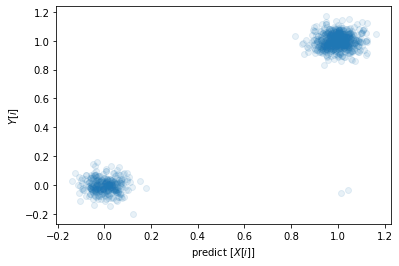

In [202]:
plt.scatter([algo.predict([X.iloc[i]])[0]+np.random.randn(1)/20 for i in range(n)]\
            ,[Y.iloc[i]+np.random.randn(1)/20 for i in range(n)]\
            ,alpha=0.1)
plt.xlabel('predict $[X[i]]$')
plt.ylabel('$Y[i]$')
plt.show

In [175]:
def ox(k):
    if k==1:
        return 'x'
    else:
        if k==-1:
            return 'o'
        else:
            return '.'
    
def move(X,nm):
    p=0
    m=-1
    X[nm-1]=-1
    testX=[X[j] for j in range(9)]
    for i in range(9):
        if X[i]==0:
            testX[i]=1
            testp=algo.predict_proba([testX])[0][1]
            print(i+1,'->',testp)
            if testp>p:
                p=testp
                m=i
            testX[i]=X[i]
    if m>-1:
        X[m]=1
        print(ox(X[0]),ox(X[1]),ox(X[2]))
        print(ox(X[3]),ox(X[4]),ox(X[5]))
        print(ox(X[6]),ox(X[7]),ox(X[8]))
        print(algo.predict_proba([X])[0][1])
        return X
    else:
        return ['?']

In [209]:
play=move([0,0,0,0,-1,0,0,0,0],5)

1 -> 0.0014733171943884058
2 -> 0.002003166888829001
3 -> 0.0013244323424069432
4 -> 0.002965159442844972
6 -> 0.0013232023328899032
7 -> 0.0017823553026350618
8 -> 0.0014579179907670873
9 -> 0.0022822012717673423
. . .
x o .
. . .
0.002965159442844972


In [210]:
play=move(play,1)

2 -> 0.0017859302926757524
3 -> 0.0019431397985211236
6 -> 0.0018983200656691333
7 -> 0.0019563766446586525
8 -> 0.0028916221759724345
9 -> 0.0018535520165767658
o . .
x o .
. x .
0.0028916221759724345


In [211]:
move(play,9)

2 -> 0.0030998743087397203
3 -> 0.0008642321311572373
6 -> 0.0010467128497708685
7 -> 0.0021458198058256464
o x .
x o .
. x o
0.0030998743087397203


[-1, 1, 0, 1, -1, 0, 0, 1, -1]

In [179]:
move(play,6)

8 -> 0.969178698534366
o o o
x x o
x x x
0.969178698534366


[-1, -1, -1, 1, 1, -1, 1, 1, 1]

In [170]:
algo.predict([[0, -1, -1, 0, 1, 0, 1, 0, 1]])

array([1], dtype=int64)